### Exploratory Data Analysis and Data Preprocessing ##

In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/complaints.csv")
df.head()

C:\Users\Abas\AppData\Local\Temp\ipykernel_6280\21003726.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/complaints.csv")


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [1]:
import sys
import os

# Get the project root directory automatically
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to Python path
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root added to PATH:", project_root)



Project root added to PATH: e:\Intelligent-Complaint-Analysis-for-Financial-Services-week_7


C:\Users\Abas\AppData\Local\Temp\ipykernel_8948\3560585231.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/complaints.csv")


Dataset loaded successfully.
Shape: (9609797, 18)

--- BASIC INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID  

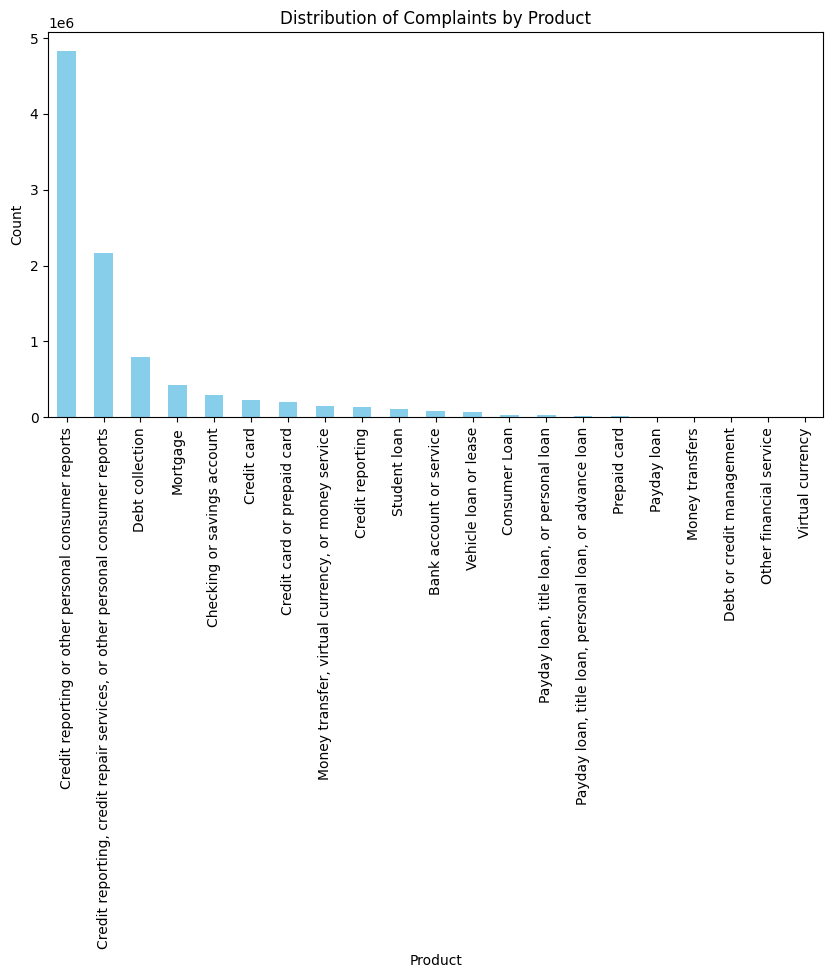


--- COMPUTING NARRATIVE LENGTH ---
count    9.609797e+06
mean     5.515649e+01
std      1.495169e+02
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: narr_len, dtype: float64


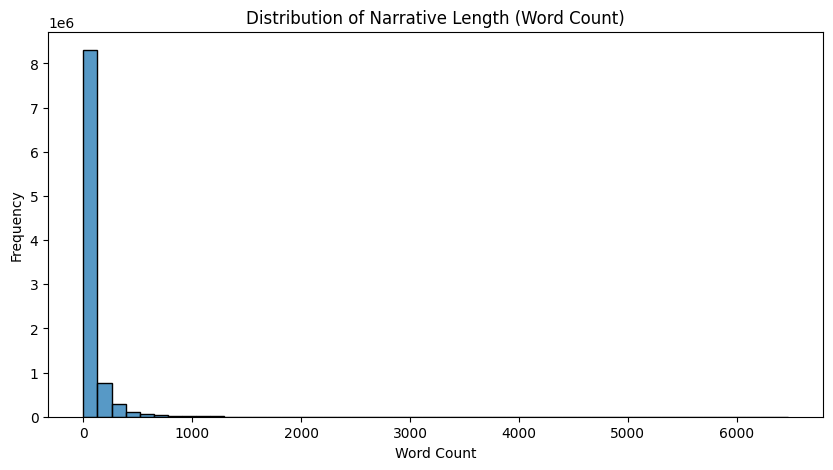


--- NARRATIVE PRESENCE ---
Complaints WITH narrative: 2980756
Complaints WITHOUT narrative: 6629041


e:\Intelligent-Complaint-Analysis-for-Financial-Services-week_7\src\eda.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


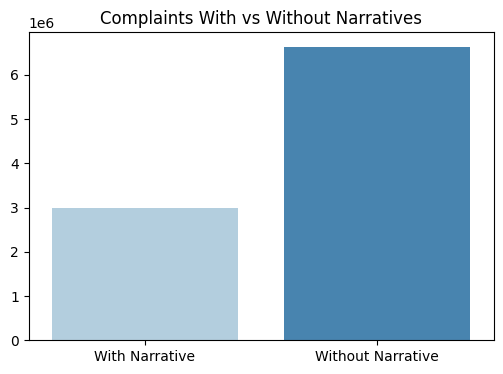

In [2]:
import pandas as pd
from src.eda import ComplaintEDA

df = pd.read_csv("../data/raw/complaints.csv")
eda = ComplaintEDA(df)
eda.run_all()

In [3]:
from src.preprocessing import ComplaintPreprocessor

preprocessor = ComplaintPreprocessor(df)
clean_df = preprocessor.run_all()

print(clean_df.head())
print(clean_df.shape)


✔ Cleaned & filtered dataset saved to: E:\Intelligent-Complaint-Analysis-for-Financial-Services-week_7\data\processed\filtered_complaints.csv
      Date received      Product                                 Sub-product  \
12237    2025-06-13  Credit card                           Store credit card   
13280    2025-06-12  Credit card  General-purpose credit card or charge card   
13506    2025-06-12  Credit card  General-purpose credit card or charge card   
13955    2025-06-09  Credit card  General-purpose credit card or charge card   
14249    2025-06-09  Credit card  General-purpose credit card or charge card   

                                                 Issue  \
12237                            Getting a credit card   
13280               Other features, terms, or problems   
13506             Incorrect information on your report   
13955  Problem with a purchase shown on your statement   
14249                     Problem when making payments   

                            

## Exploratory Data Analysis Summary ##

The full CFPB complaint dataset contains approximately 9.6 million entries spanning 18 columns, including product information, consumer narratives, and company responses. Initial inspection revealed that most complaints relate to credit reporting or other personal consumer reports, while complaints specifically about Credit Cards, Personal Loans, Savings Accounts, and Money Transfers are a smaller subset, collectively totaling around 420,000 complaints. Notably, many records are missing consumer narratives, with only ~3 million complaints containing actual textual feedback from consumers. This indicates that a large portion of complaints are structured metadata without detailed narratives, which is crucial to consider for building a text-based RAG pipeline. 

Analysis of the narrative lengths shows a wide variation, ranging from very short complaints of a single word to extremely long submissions exceeding 6,000 words. The median narrative length is around 50 words, suggesting that most consumer complaints are concise but there are some outliers that may require additional preprocessing or truncation. This variation highlights the importance of text cleaning and normalization before generating embeddings for retrieval-based models.

Finally, filtering the dataset to include only the specified products and removing complaints without narratives resulted in a cleaned dataset of ~82,000 records, which has been saved for downstream processing. This filtered dataset retains essential information such as product category, issue type, and consumer narratives, and has been cleaned by lowercasing text, removing special characters, and stripping boilerplate language. These preprocessing steps ensure that the data is ready for embedding generation and RAG-based question-answering, while maintaining sufficient detail to capture meaningful customer insights.